In [94]:
import matplotlib.pyplot as plt
import ruptures as rpt
import numpy as np
import pandas as pd
from logzero import logger
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KernelDensity
import arviz as az
%matplotlib widget


In [95]:
def generate_mask_using_CPD(feature_seg, mean_mask_length=2):
    n_points = len(feature_seg)

    # change point detection
    model = "rbf"  # "l2", "l1"
    algo = rpt.KernelCPD(kernel=model, min_size=3, ).fit(feature_seg)
    # algo = rpt.KernelCPD(kernel="rbf", params={"gamma": 1e-2}, min_size=2).fit(feature_seg)
    # change_points = algo.predict(n_bkps=n_expected_change_point)
    change_points = algo.predict(pen=1)
    # change_points = algo.predict(n_bkps=21)
    logger.info(f'size: {len(change_points)},  change_points: {change_points}')
    rpt.show.display(feature_seg, change_points, [2, 5, 6, 9, 10, 34], figsize=(10, 6))
    plt.show()

    # 0s means mask, 1s means not affected
    mask_vec = np.ones(n_points)
    for cp in change_points:
        # logger.info(cp)
        # check beginning
        if int(cp - int(mean_mask_length / 2)) <= 0:
            mask_vec[:mean_mask_length] = 0
        # check end
        elif int(cp + int(mean_mask_length / 2)) >= n_points:
            mask_vec[-mean_mask_length:] = 0
        else:
            mask_vec[cp - int(mean_mask_length / 2):cp - int(mean_mask_length / 2) + mean_mask_length] = 0
    logger.info(f'mask_vec:\n {mask_vec}')
    return mask_vec



In [96]:
# i = 767
i = 256
trj = np.load(f'../data/SHL_features/clean_trj_segs.npy', allow_pickle=True)[i]
fs = np.load(f'../data/SHL_features/clean_multi_feature_segs.npy', allow_pickle=True)[i]

d = fs[2]
v = fs[3]
a = fs[4]
j = fs[5]
hc = fs[7]
hcr = fs[8]

x = trj[0]
y = trj[1]
minx, miny = min(x), min(y)

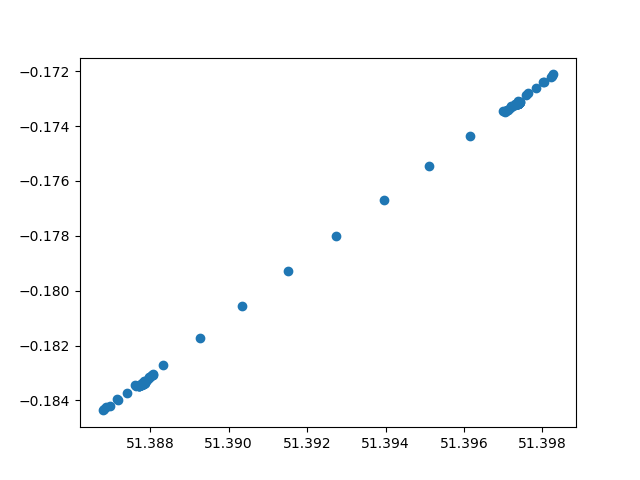

In [97]:
# f1 = plt.figure(1, figsize=(15,15))
plt.scatter(x, y)


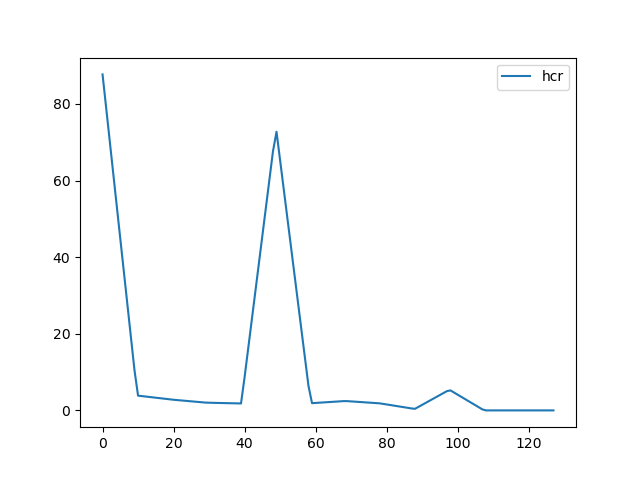

In [98]:
plt.close()
f2 = plt.figure(2)
plt.plot(hcr, label='hcr')
# plt.plot(v, label='v')
plt.legend()

/tmp/ipykernel_4497/2097148276.py:5: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(h[3])


array([[-0.18343862, 51.38779245],
       [-0.18339173, 51.38783504],
       [-0.18336024, 51.38786274],
       [-0.18334222, 51.38787739],
       [-0.18333575, 51.38788085],
       [-0.18333888, 51.38787495],
       [-0.1833497 , 51.38786156],
       [-0.18336626, 51.38784252],
       [-0.18338664, 51.38781968],
       [-0.18340891, 51.38779488],
       [-0.18343112, 51.38776997],
       [-0.18345136, 51.38774681],
       [-0.1834677 , 51.38772724],
       [-0.18347819, 51.38771311],
       [-0.1834809 , 51.38770627],
       [-0.18347392, 51.38770856],
       [-0.1834553 , 51.38772184],
       [-0.18342311, 51.38774795],
       [-0.18337543, 51.38778874],
       [-0.18331155, 51.3878449 ],
       [-0.18323834, 51.38790992],
       [-0.18316556, 51.38797457],
       [-0.18310299, 51.38802958],
       [-0.1830604 , 51.38806572],
       [-0.18304755, 51.38807373],
       [-0.18307421, 51.38804438],
       [-0.18315015, 51.3879684 ],
       [-0.18328514, 51.38783656],
       [-0.18348514,

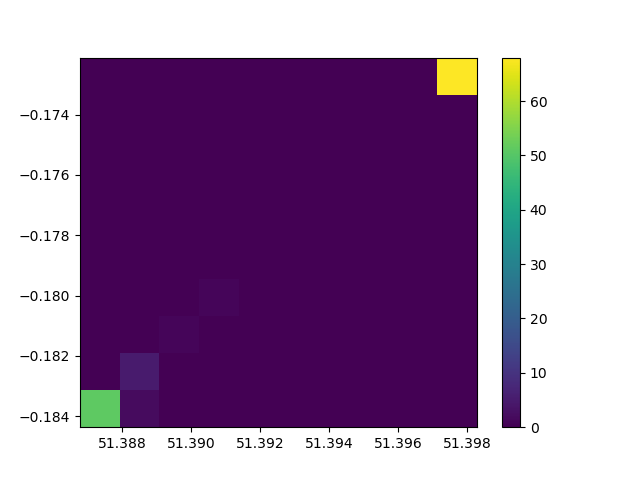

In [109]:
plt.close()
# trj = np.array((x, y)).T
trj = np.array((y,x)).T
plt.hist2d(x, y)
plt.colorbar(h[3])
trj

In [100]:
# x_n = np.random.normal(1.75, 1, 512)
# x_n

In [101]:
# f5 = plt.figure(5)
# az.plot_kde(x_n, rug=True)
# plt.yticks([0], alpha=0)

In [102]:
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(trj)
sc = kde.score_samples(trj)
scc = np.exp(sc)
scc

array([0.15914437, 0.15914447, 0.15914453, 0.15914457, 0.15914458,
       0.15914457, 0.15914454, 0.1591445 , 0.15914446, 0.15914441,
       0.15914436, 0.15914431, 0.15914427, 0.15914425, 0.15914424,
       0.15914425, 0.15914428, 0.15914434, 0.15914444, 0.15914457,
       0.15914471, 0.15914485, 0.15914498, 0.15914506, 0.15914508,
       0.15914502, 0.15914487, 0.15914459, 0.15914416, 0.15914364,
       0.15914309, 0.15914259, 0.15914225, 0.15914216, 0.15914241,
       0.15914307, 0.15914418, 0.15914569, 0.1591474 , 0.15914902,
       0.15915035, 0.15915122, 0.15915158, 0.15915146, 0.15915097,
       0.15915029, 0.15914964, 0.15914915, 0.15914888, 0.15914882,
       0.15914892, 0.15914914, 0.15914941, 0.15914969, 0.15914993,
       0.15915011, 0.15915021, 0.15915027, 0.15915028, 0.15915026,
       0.15915021, 0.15915015, 0.15915009, 0.15915002, 0.15914997,
       0.15914994, 0.15914992, 0.15914991, 0.15914991, 0.15914992,
       0.15914994, 0.15914996, 0.15914997, 0.15914998, 0.15914

sort_scc:[ 42  43  41  44  40  45  58  57  59  56  60  61  55  62  63  76  75  77
  74  78  73  79  80  72  64  81  82  83  94  95  93  96  84  92  97  98
  91  99 113 112 114 111 115 110 116 117 109 127 118 119 100 126 108 120
 121 125 122 124 123 107 101 106 105 102 104 103  90  85  89  71  88  86
  87  70  65  54  69  66  68  67  53  46  52  47  51  39  50  48  49  38
  37  24  23  25  22  26  21  20  27   4   5  19   3   6   2   7   1   8
  18   9   0  10  17  11  16  12  15  13  14  36  28  29  30  35  31  34
  32  33]


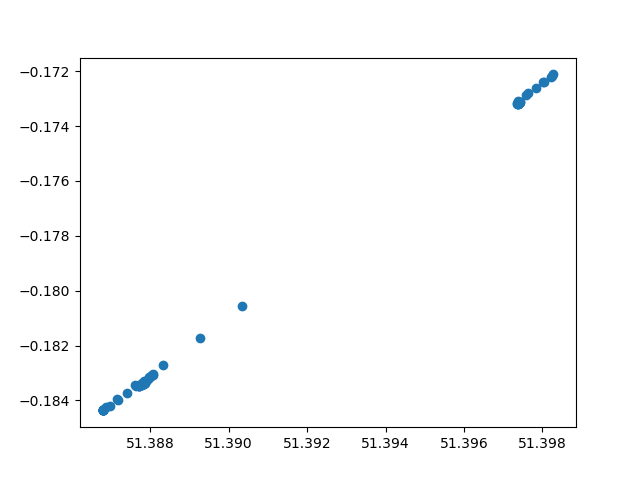

In [103]:
plt.close()
sort_scc = np.argsort(-scc)
print(f'sort_scc:{sort_scc}')
masked = sort_scc[:20]
for i in masked:
    x[i] = minx
    y[i] = miny

plt.scatter(x, y)

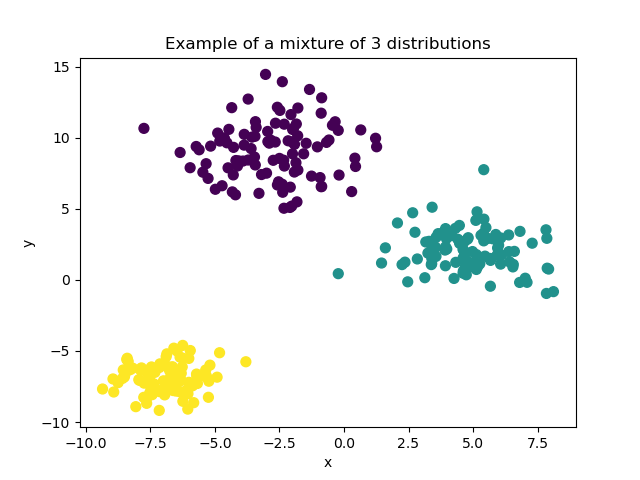

[array([[-7.33898809, -7.72995396],
        [-7.74004056, -7.26466514],
        [-0.8641078 ,  6.57259883],
        [ 4.31335703,  3.62133496],
        [-8.91775173, -7.8881959 ],
        [ 5.92636827,  1.73326189],
        [-2.16283577,  9.78492089],
        [ 5.25927602,  1.12758285],
        [-3.4675461 ,  8.64296817],
        [-4.89180462, 10.32739335],
        [-3.71261085, 12.7188425 ],
        [ 5.17540207,  0.93380529],
        [-2.09147043,  5.09494588],
        [-5.33993911,  8.17299548],
        [-7.53026976, -7.36723498],
        [-3.91330381,  8.35896184],
        [-8.50716963, -6.83202465],
        [ 1.60216496,  2.25285116],
        [-2.31504252, 10.95157611],
        [-1.33548344, 13.39519738],
        [-0.19200647,  7.37292149],
        [-2.83176905,  9.82238784],
        [ 6.10255844,  1.75258361],
        [-6.99195524, -7.10107919],
        [-3.43603301,  8.08282662],
        [-6.34982301, -5.43854097],
        [-7.45639852, -6.12471837],
        [ 3.41254781,  5.111

In [104]:
plt.close()
from sklearn.datasets import make_blobs
import scipy.stats as st
n_components = 3
X, truth = make_blobs(n_samples=300, centers=n_components,
                      cluster_std = [2, 1.5, 1],
                      random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=50, c = truth)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y");
plt.show()

[X, truth]

In [105]:
#https://stackoverflow.com/questions/41577705/how-does-2d-kernel-density-estimation-in-python-sklearn-work
def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs):
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins,
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

zz
[[0.15914466 0.15914479 0.15914491 ... 0.15914526 0.15914514 0.15914503]
 [0.15914477 0.1591449  0.15914502 ... 0.15914537 0.15914525 0.15914514]
 [0.15914488 0.159145   0.15914512 ... 0.15914547 0.15914536 0.15914525]
 ...
 [0.15914531 0.15914543 0.15914556 ... 0.15914591 0.15914579 0.15914568]
 [0.15914521 0.15914534 0.15914546 ... 0.15914581 0.15914569 0.15914558]
 [0.15914511 0.15914524 0.15914536 ... 0.15914571 0.15914559 0.15914548]]
sort zz
[[[ 0  0]
  [ 1  0]
  [ 0  1]
  ...
  [52 52]
  [51 51]
  [52 51]]]


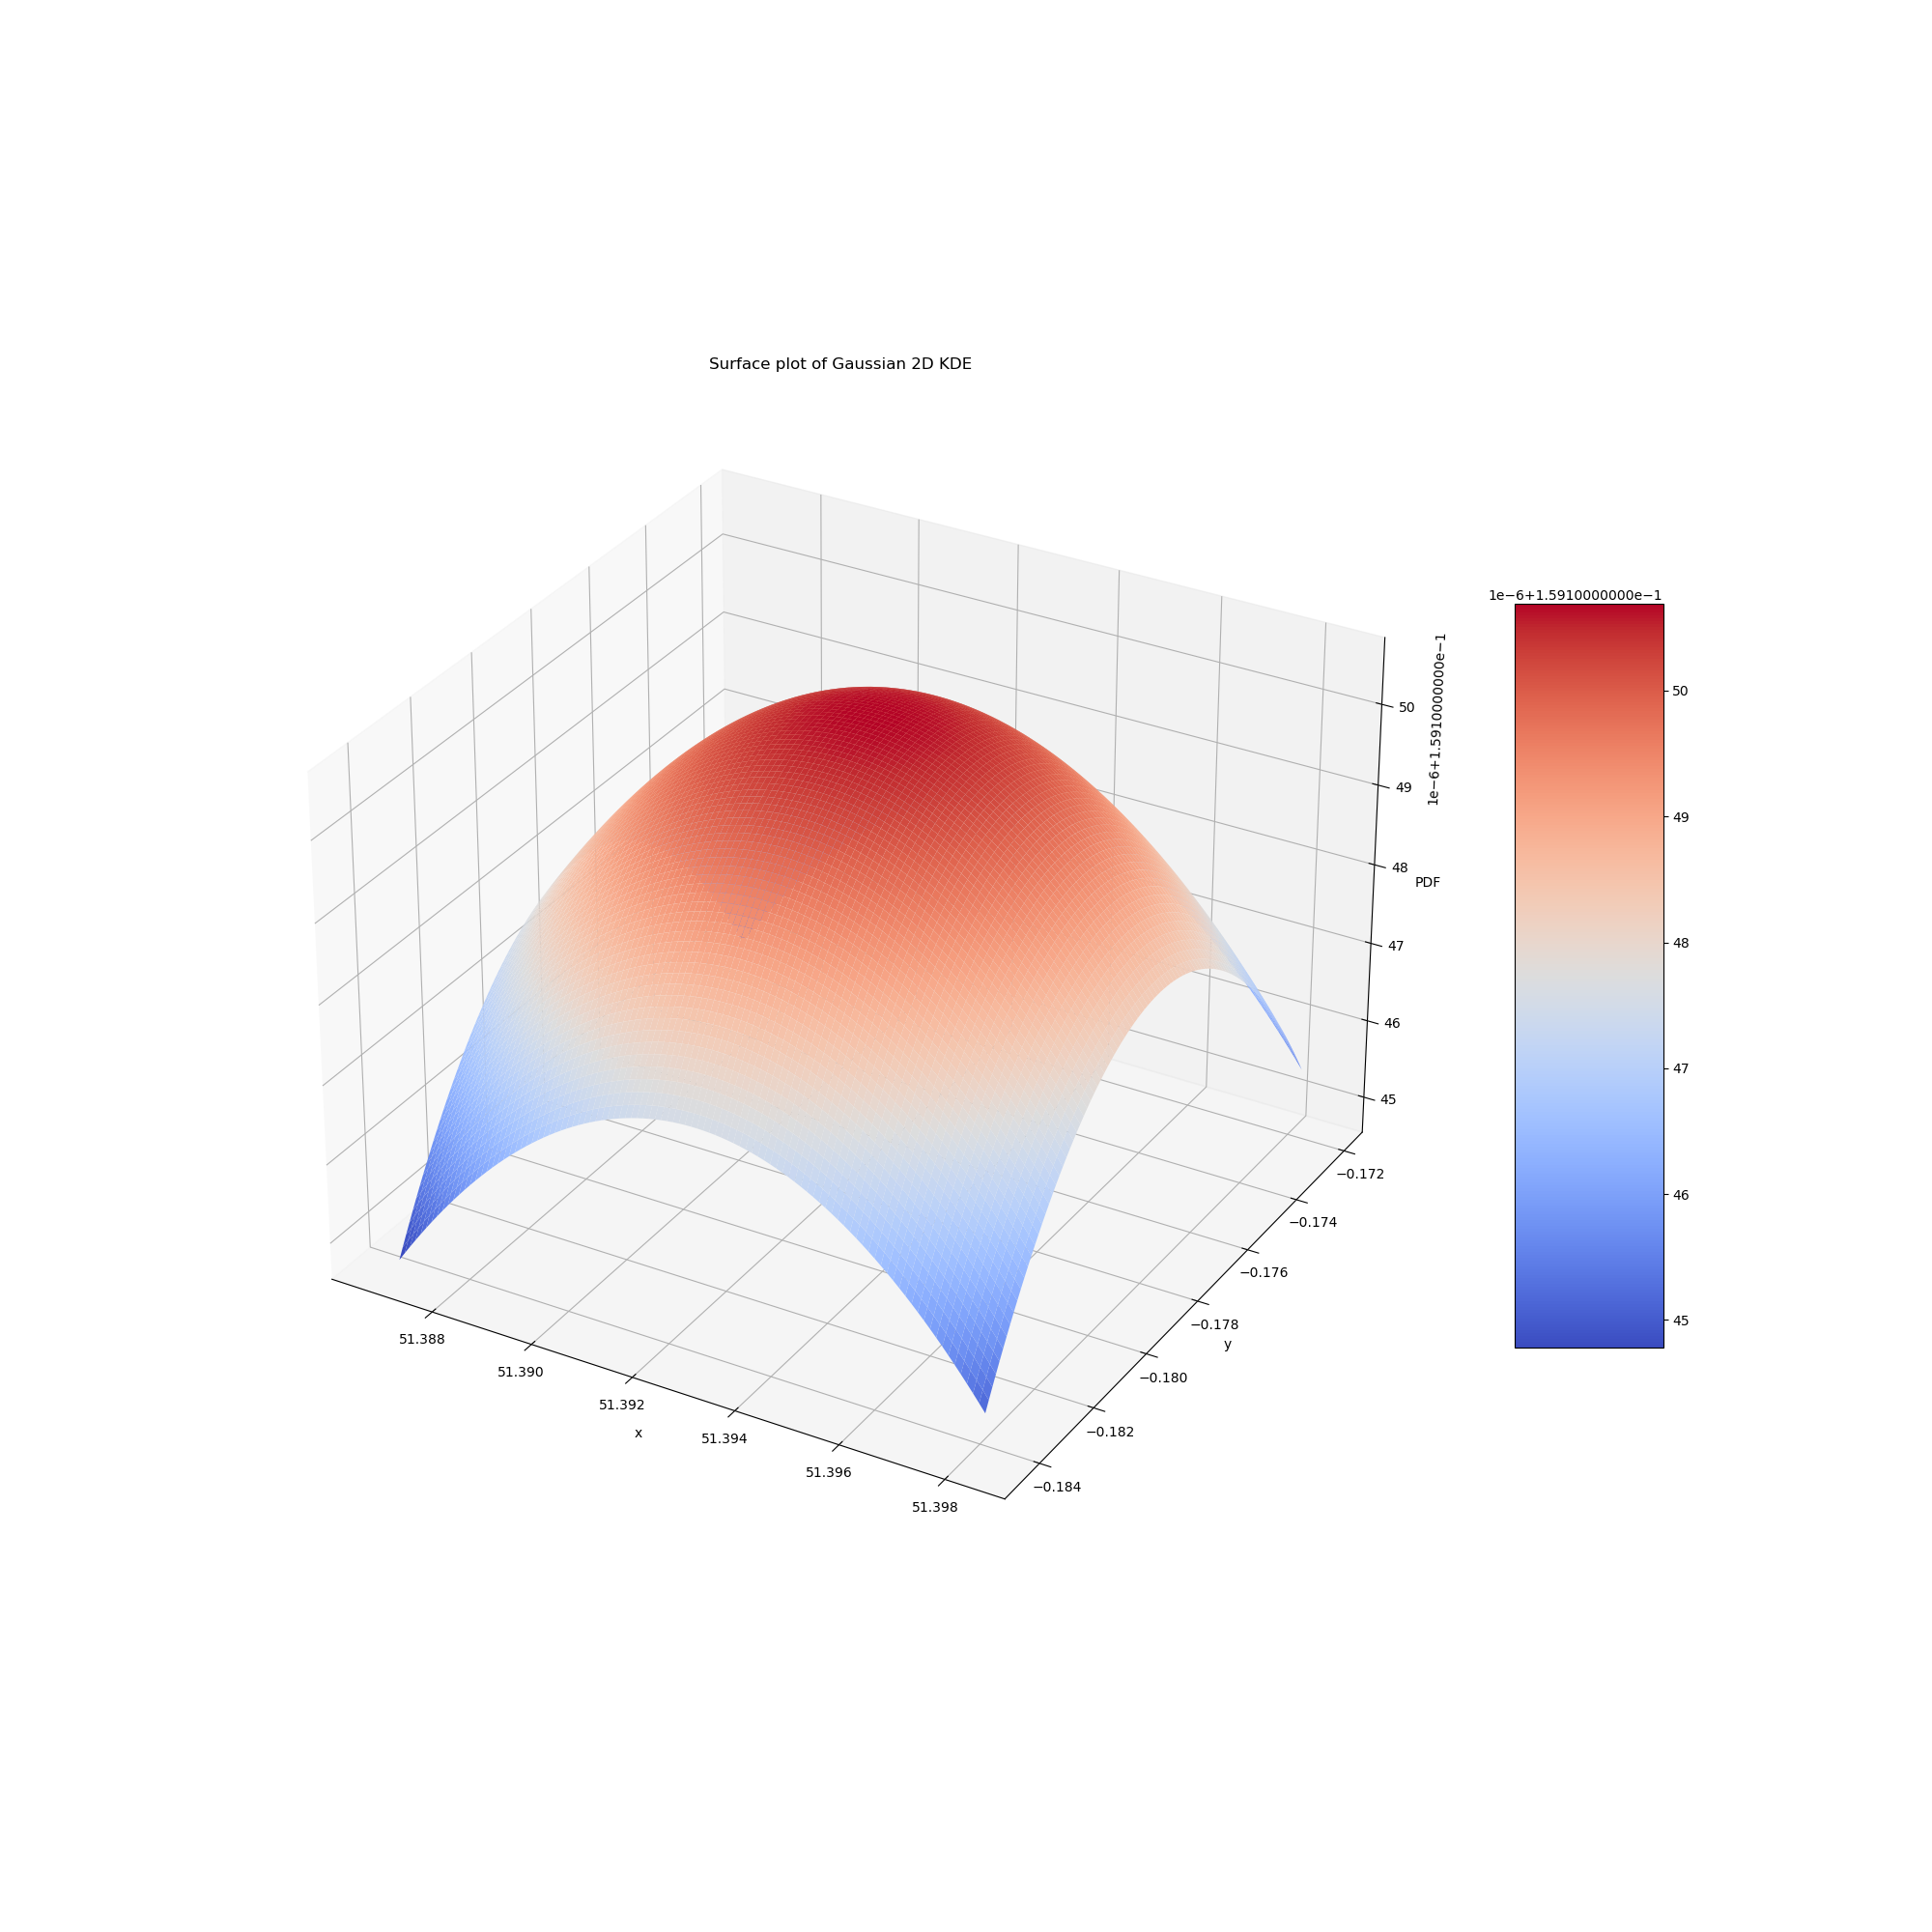

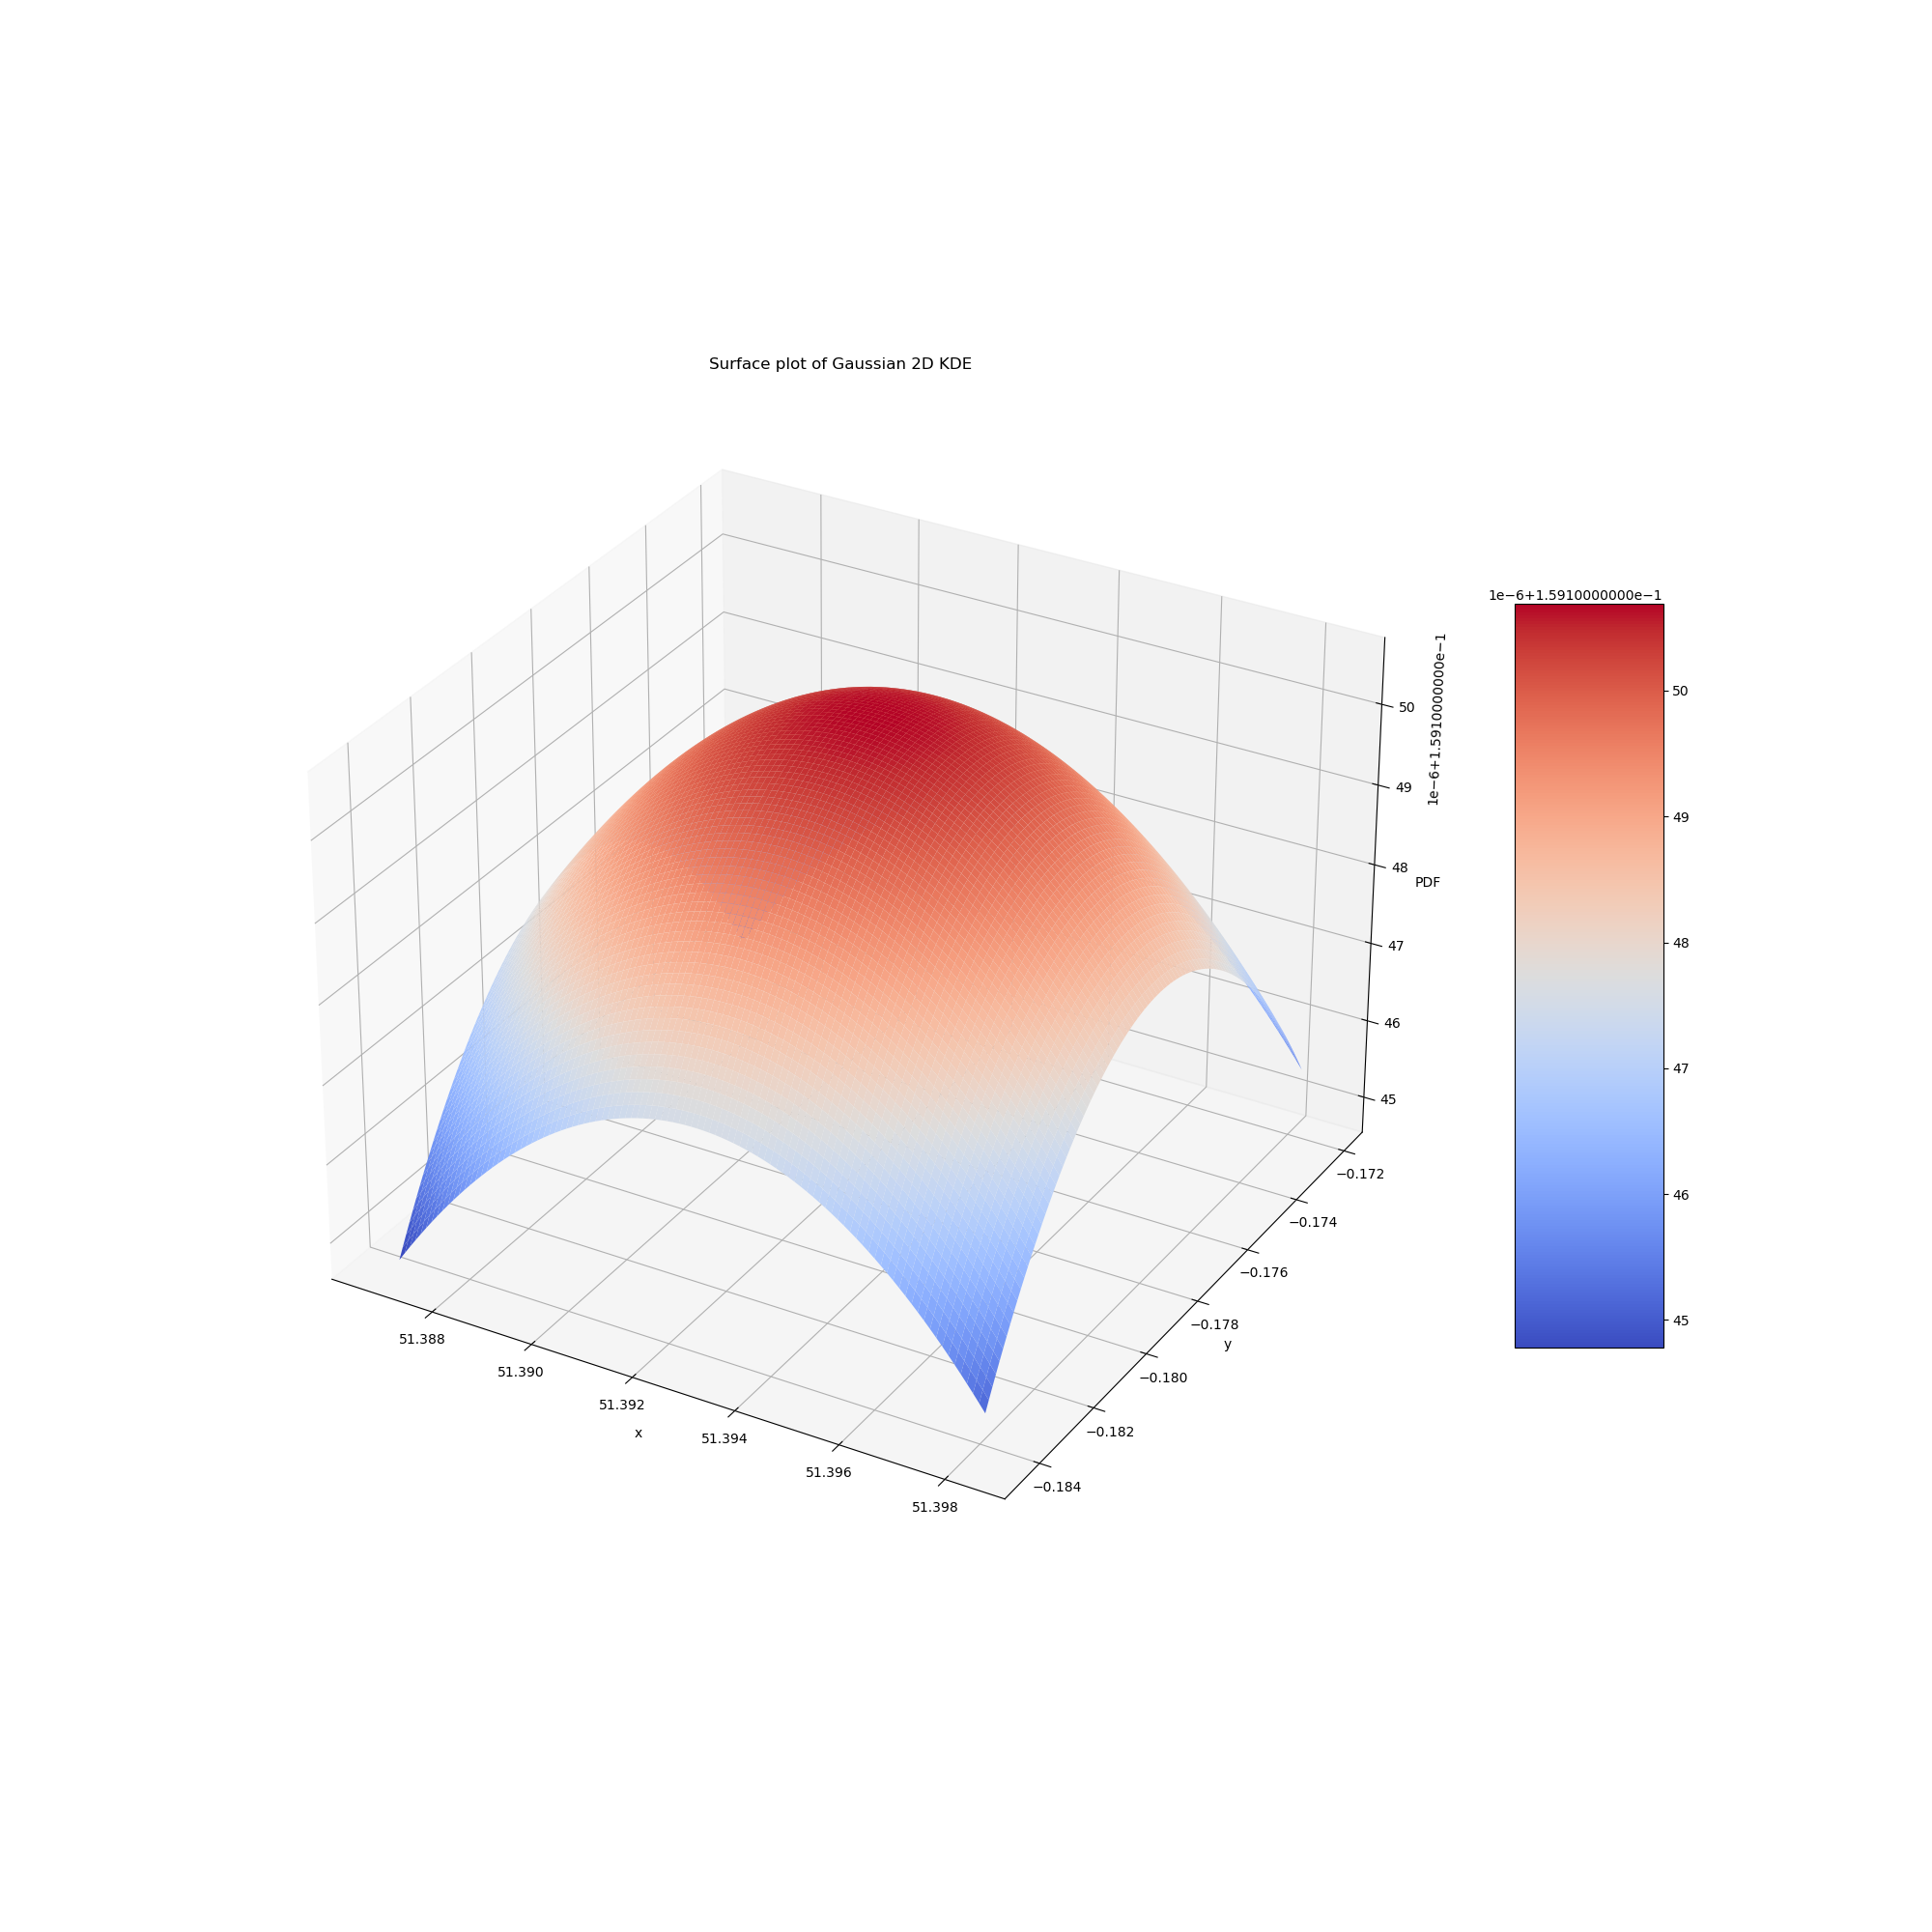

In [106]:
bin=100
# x = X[:, 0]
# y = X[:, 1]
xx, yy, zz = kde2D(x, y, 1.0, complex(0,bin), complex(0,bin))
print('zz')
print(zz)
print('sort zz')
szz=np.dstack(np.unravel_index(np.argsort(zz.ravel()), (bin, bin)))
print(szz)
f7 = plt.figure(7, figsize=(20, 20))
# ax = plt.axes(projection='3d')
# w = ax.plot_wireframe(xx, yy, zz)

ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
f7.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
# ax.view_init(60, 35)
f7.show()
